In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd

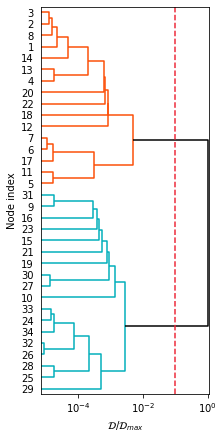

In [5]:
from farrow_and_ball import *
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
import seaborn as sns
from matplotlib.pyplot import cm
from scipy.cluster import hierarchy
import matplotlib as mpl
import matplotlib.colors
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot
import matplotlib.ticker
import networkx as nx
#from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from scipy.linalg import expm, sinm, cosm
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from tqdm import tqdm

ax_dict = plt.figure(constrained_layout=True,figsize=(3,6)).subplot_mosaic(
    """
     A
    """
)

#fig, ax = plt.subplots(1, 1, figsize=(4, 6))

Th= 0.1
G = nx.karate_club_graph()
w=1/nx.laplacian_spectrum(G)
tau=w[33]
L=nx.laplacian_matrix(G)
L1=L.todense()
num=expm((-tau*L1))
den=np.trace(num)
rho=num/den
Trho=np.copy(1.0/rho)#1/adj2
Trho = np.maximum(Trho, Trho.transpose() )
np.fill_diagonal(Trho, 0)



dists = squareform(Trho)
linkage_matrix = linkage(dists, "average")
labelList = [i+1 for i in range(0, len(G.nodes()))]
tmax=linkage_matrix[::, 2][-1]#+0.01*linkage_matrix[::, 2][-1]
linkage_matrix = linkage(dists/tmax, "average")
dendrogram(linkage_matrix,labels=labelList,ax=ax_dict['A'],leaf_rotation=0,orientation='right',color_threshold=Th,above_threshold_color='k',leaf_font_size=10)
CM=fcluster(linkage_matrix, t=Th, criterion='distance')
cmap = build_colormap(MiscPalette.TONKA, True)
cmap1 = cmap(np.linspace(0, 1, np.max(CM)))
#cmap1[0]=[46/255., 159/255., 223/255., 1.]
cmap1[0]=[0., 175/255., 187/255., 1.]
#cmap1[1]=[231/255.,184/255.,0.,1.]
cmap1[1]=[252/255., 78/255., 7/255., 1.]
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap1])
cont=0
ax_dict['A'].axvline(x = Th, color = '#ED2939', linestyle = '--')
ax_dict['A'].set_xscale('linear')
tmin=linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax=linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]
ax_dict['A'].set_xlim(tmin,tmax)
ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
ax_dict['A'].set_ylabel('Node index')
ax_dict['A'].set_xscale('log')
ax_dict['A'].set_xticks([1e-4,1e-2,1e0])


plt.show()